# Sourcing & Analysis Time Series Data

## This Script consists of following:
### 1. Importing your libraries and data
### 2. Subsetting, wrangling, and cleaning time-series data
   ### 2.1 Data Cleaning, Data Wrangling, Subsetting
### 3. Time series analysis: decomposition
### 4. Testing for stationarity
### 5. Stationarizing the Data
### 6. Check for Autocorrelation

# 1. Importing your libraries and data 

In [509]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [510]:
# Importing Data
# Data Source: World Agricultural Supply and Demand Estimates from Nasdaq Data Link (https://data.nasdaq.com/databases/WASDE)
# This data feed covers all WASDE reports published since January 2011.

path = r'/Users/amritkaur/Desktop/CF Data Immersion/Chapter 6/'
# Import data 'WASDE_DATA.csv' 
data = pd.read_csv(os.path.join(path, 'Task 6.6', 'WASDE_DATA.csv'))

In [511]:
data.head()

,code,report_month,region,commodity,item,year,period,value,min_value,max_value
0,GRAINS_WORLD_08,2020-10,World,Total Grains 4/,Output,2018/19,Annual,2625.19,NaN,NaN
1,GRAINS_WORLD_08,2020-10,World,Total Grains 4/,Total Supply,2018/19,Annual,3447.76,NaN,NaN
2,GRAINS_WORLD_08,2020-10,World,Total Grains 4/,Trade 2/,2018/19,Annual,429.35,NaN,NaN
3,GRAINS_WORLD_08,2020-10,World,Total Grains 4/,Total Use 3/,2018/19,Annual,2640.27,NaN,NaN
4,GRAINS_WORLD_08,2020-10,World,Total Grains 4/,Ending Stocks,2018/19,Annual,807.49,NaN,NaN


# 2. Subsetting, wrangling, and cleaning time-series data

## 2.1 Data Cleaning, Data Wrangling, Subsetting

In [514]:
# Drop the unnecessary columns and re-export new version
data = data.drop(columns = ['code', 'min_value', 'max_value', 'item','year'])
data = data.rename(columns = {'commodity': 'Items'})
data.to_csv(os.path.join(path, 'Task 6.6', 'WASDE_DATA_cleaned.csv'))

In [515]:
data.head(30)

,report_month,region,Items,period,value
0,2020-10,World,Total Grains 4/,Annual,2625.19
1,2020-10,World,Total Grains 4/,Annual,3447.76
2,2020-10,World,Total Grains 4/,Annual,429.35
3,2020-10,World,Total Grains 4/,Annual,2640.27
4,2020-10,World,Total Grains 4/,Annual,807.49
5,2020-10,World,Total Grains 4/,Annual,2670.99
6,2020-10,World,Total Grains 4/,Annual,3478.48
7,2020-10,World,Total Grains 4/,Annual,440.85
8,2020-10,World,Total Grains 4/,Annual,2669.55
9,2020-10,World,Total Grains 4/,Annual,808.93


In [516]:
data.shape

(856034, 5)

In [517]:
# Create a subset that contains data from United States
data_us = data.loc[(data['region'] == 'United States')]

In [518]:
data_us.head()

,report_month,region,Items,period,value
80,2020-10,United States,Total Grains 4/,Annual,436.32
81,2020-10,United States,Total Grains 4/,Annual,532.30
82,2020-10,United States,Total Grains 4/,Annual,83.45
83,2020-10,United States,Total Grains 4/,Annual,357.57
84,2020-10,United States,Total Grains 4/,Annual,91.28


In [519]:
data_us.shape

(286535, 5)

In [520]:
data_us.columns

Index(['report_month', 'region', 'Items', 'period', 'value'], dtype='object')

In [521]:
# rename the column name "period" to "frequency"
data_us.rename(columns ={'period' : 'frequency'},inplace = True)
data_us.rename(columns = {'value':'price'}, inplace = True)

In [522]:
data_us.head()

,report_month,region,Items,frequency,price
80,2020-10,United States,Total Grains 4/,Annual,436.32
81,2020-10,United States,Total Grains 4/,Annual,532.30
82,2020-10,United States,Total Grains 4/,Annual,83.45
83,2020-10,United States,Total Grains 4/,Annual,357.57
84,2020-10,United States,Total Grains 4/,Annual,91.28


In [523]:
# Reset the index
data_us = data_us.reset_index()
data_us = data_us.drop(columns = ['index'])

In [524]:
data_us.min()

report_month          2010-08
region          United States
Items            All Milk  3/
frequency              Annual
price                   -94.0
dtype: object

In [525]:
data_us.max()

report_month          2024-02
region          United States
Items                   White
frequency            Sep Proj
price                115674.0
dtype: object

In [526]:
data_us.head()

,report_month,region,Items,frequency,price
0,2020-10,United States,Total Grains 4/,Annual,436.32
1,2020-10,United States,Total Grains 4/,Annual,532.30
2,2020-10,United States,Total Grains 4/,Annual,83.45
3,2020-10,United States,Total Grains 4/,Annual,357.57
4,2020-10,United States,Total Grains 4/,Annual,91.28


In [527]:
data_us.shape

(286535, 5)

In [528]:
from datetime import datetime

data_us['date'] = pd.to_datetime(data_us['report_month']) 
data_us = data_us.set_index('date') # Set the datetime as the index of the dataframe.
data_us.drop(['report_month'], axis=1, inplace=True) # Drop the "report_month" column.
data_us.head()

,region,Items,frequency,price
date,,,,
2020-10-01,United States,Total Grains 4/,Annual,436.32
2020-10-01,United States,Total Grains 4/,Annual,532.30
2020-10-01,United States,Total Grains 4/,Annual,83.45
2020-10-01,United States,Total Grains 4/,Annual,357.57
2020-10-01,United States,Total Grains 4/,Annual,91.28


In [529]:
# Check for missing values (you shouldn't have any)
data_us.isnull().sum() 

region          0
Items           0
frequency       0
price        8931
dtype: int64

In [530]:
# Impute missing values with median

data_us['price'].fillna(data_us['price'].median(), inplace=True)
data_us.isnull().sum()

region       0
Items        0
frequency    0
price        0
dtype: int64

In [531]:
# Check for duplicates
dups = data_us.duplicated()
dups.sum()

204102

In [532]:
data_us.drop_duplicates(subset =['price'], keep = 'last')

,region,Items,frequency,price
date,,,,
2020-10-01,United States,Oilmeals,Annual,53.27
2020-10-01,United States,Oilmeals,Annual,39.93
2020-10-01,United States,Vegetable Oils,Annual,16.11
2020-10-01,United States,Soybean Oil,Annual,24890.00
2020-10-01,United States,Soybean Oil,Annual,26990.00
...,...,...,...,...
2024-02-01,United States,All Milk 3/,Annual,25.34
2024-02-01,United States,All Milk 3/,Jan,20.60
2024-02-01,United States,All Milk 3/,Feb,20.48


In [533]:
data_us = data_us.drop(columns = ['region', 'Items', 'frequency'])

In [534]:
data_us.head()

,price
date,
2020-10-01,436.32
2020-10-01,532.30
2020-10-01,83.45
2020-10-01,357.57
2020-10-01,91.28


In [535]:
data_us.shape

(286535, 1)

In [536]:
# Group by 'date' and calculate the mean value for each date
date_price = data_us.groupby('date')['price'].mean()

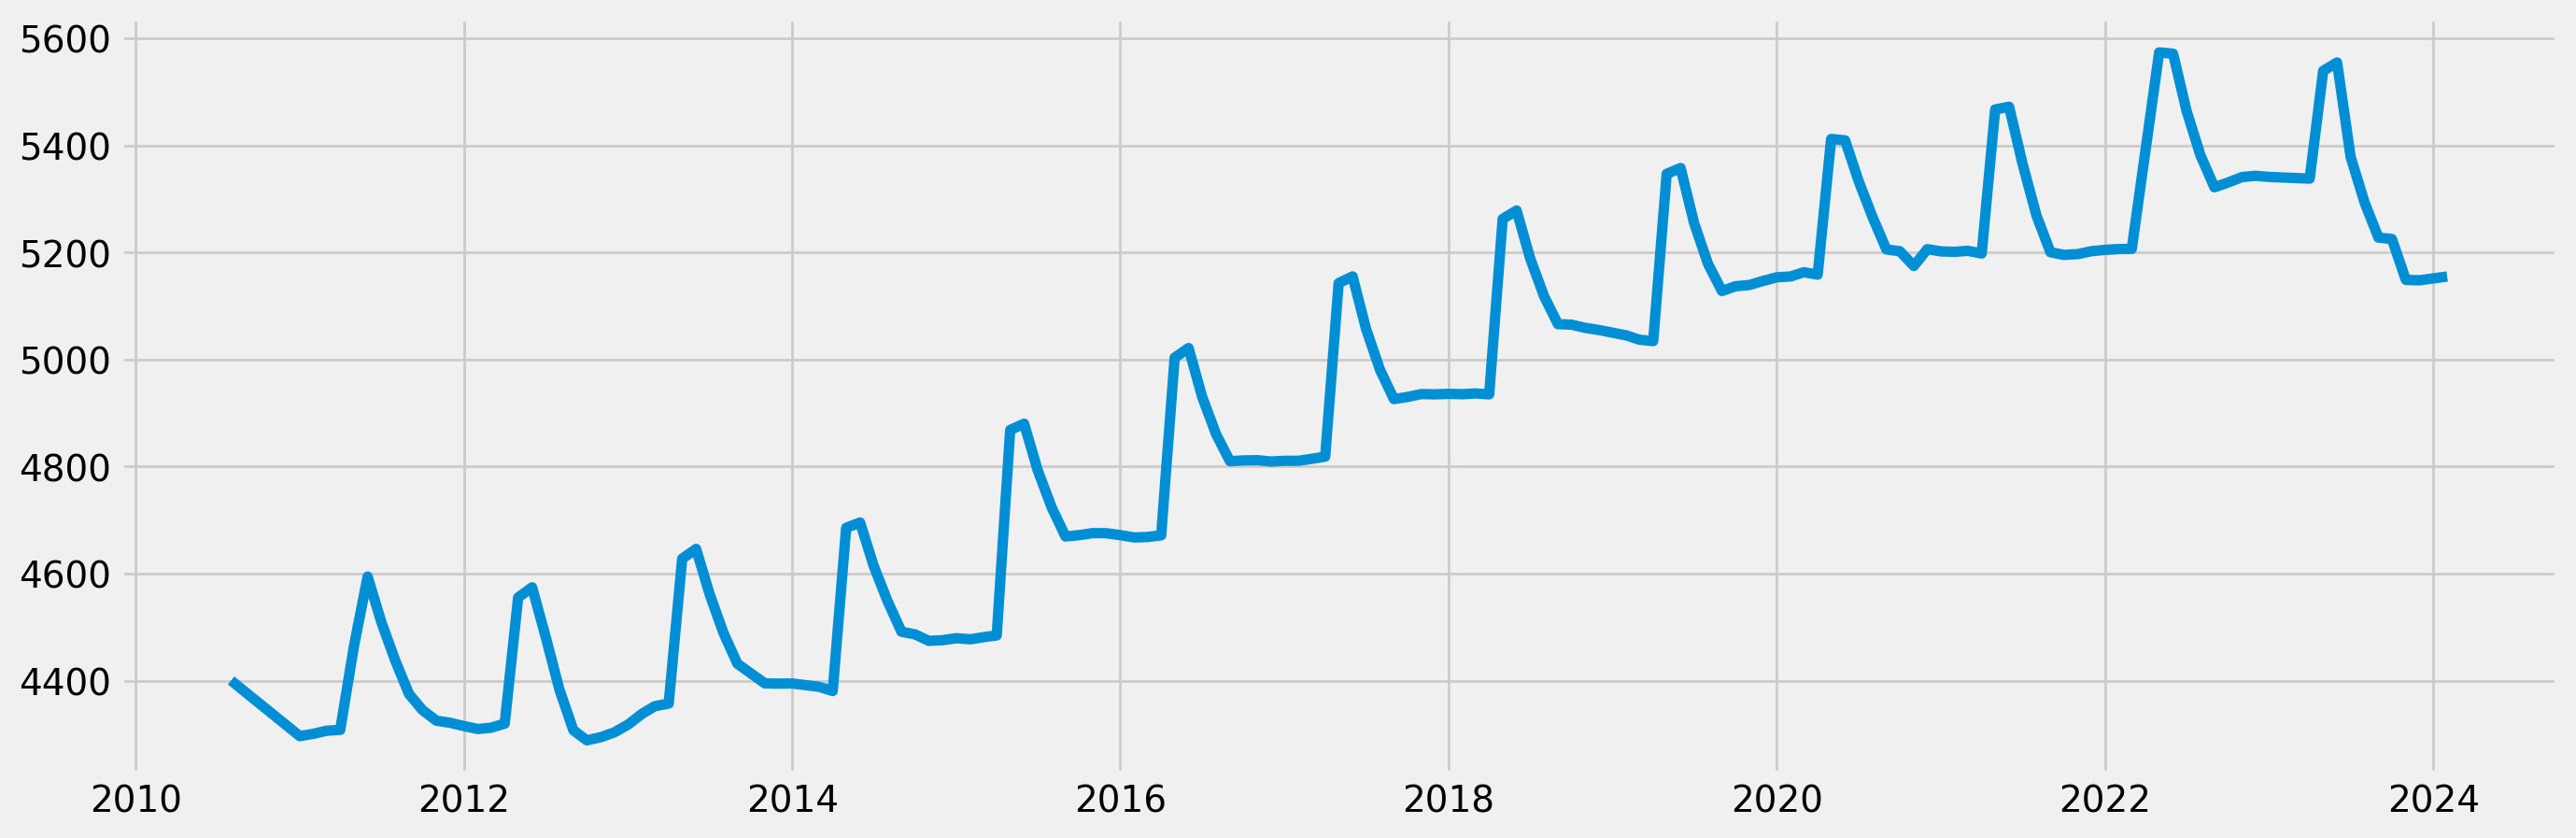

In [537]:
# Plot the data
plt.figure(figsize=(15,5), dpi=200)
plt.plot(date_price)

### Observation:
#### While the general trend is increasing, the data does not rise in a straight line. There are short-term ups and downs, which could be due to temporary shocks, market variations, or other influencing factors.The overall trend appears to be increasing over time and there is a clear repeating pattern observed within each year.

# 3. Time series analysis: Decomposition

In [540]:
# Decompose the data's components
decomposition = sm.tsa.seasonal_decompose(date_price, model='additive',period =12)

In [541]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

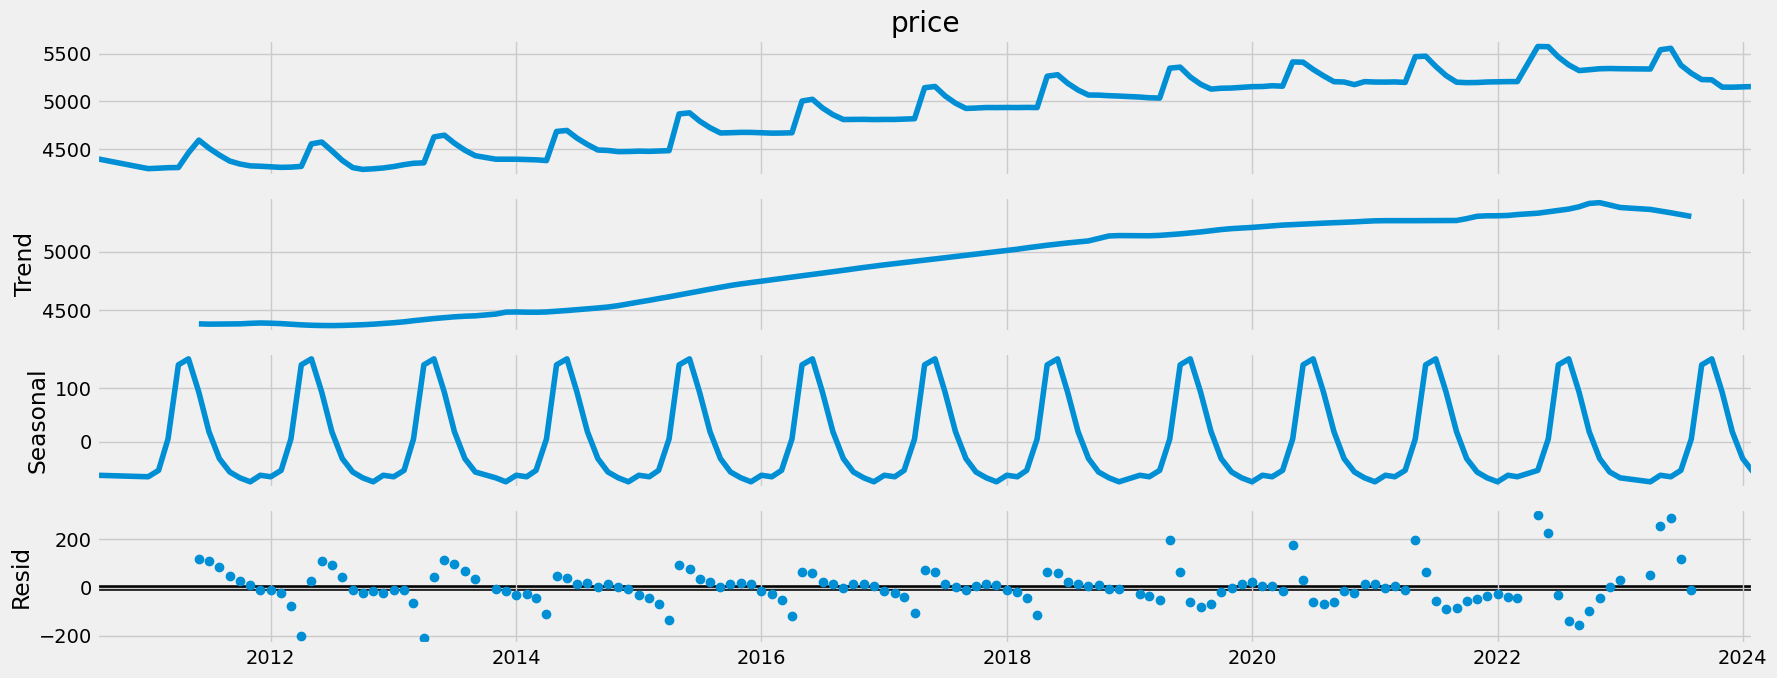

In [542]:
# Plot the separated components
decomposition.plot()
plt.show()

### Insights:
#### 1. The first chart is the level. This is just the data itself including all its components.
#### 2. The second chart is the Trend. There is a gradual increase over time. 
#### 3. The third chart is the seasonality. There is seasonality in this data.
#### 4. The 4th chart is the noise or "residual'. There isn't much unexplained noise and most residual values are centered around zero,   indicating a good decomposition.
#### 5. The bottom line is there's presence of both an upward trend and seasonality, this data is considered non-stationary. We will conduct a statistical test to confirm this.


# 4. Testing for stationarity

In [545]:
# Conduct a Dickey-Fuller test to check for stationarity

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): 
    print('Dickey-Fuller Stationarity Test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key, value in test[4].items():
        result['Critical Value (%s)'%key] = value
    print(result)

# Apply the test on the time series
dickey_fuller(date_price)

Dickey-Fuller Stationarity Test:
Test Statistic                  -1.269523
p-value                          0.642998
Number of Lags Used             12.000000
Number of Observations Used    141.000000
Critical Value (1%)             -3.477601
Critical Value (5%)             -2.882266
Critical Value (10%)            -2.577822
dtype: float64


### The test statistic (-1.2695) is not lower than any of these critical values, reinforcing that the data is not stationary. The Test Statistic, -1.269523, which is smaller than critical value. Since the p-value is much greater than 0.05, we fail to reject the null hypothesis (which assumes the data has a unit root, i.e., is non-stationary). The test statistic is not low enough compared to critical values, further confirming non-stationarity.

# 5. Stationarizing the Data

In [581]:
# Stationarize the data by using the differencing technique
data_diff = date_price - date_price.shift(1)

# Remove any mising values as a result of the differencing
data_diff.dropna(inplace=True)

In [583]:
data_diff.head()

date
2011-01-01   -103.962562
2011-02-01      4.466043
2011-03-01      5.508618
2011-04-01      1.714757
2011-05-01    153.860306
Name: price, dtype: float64

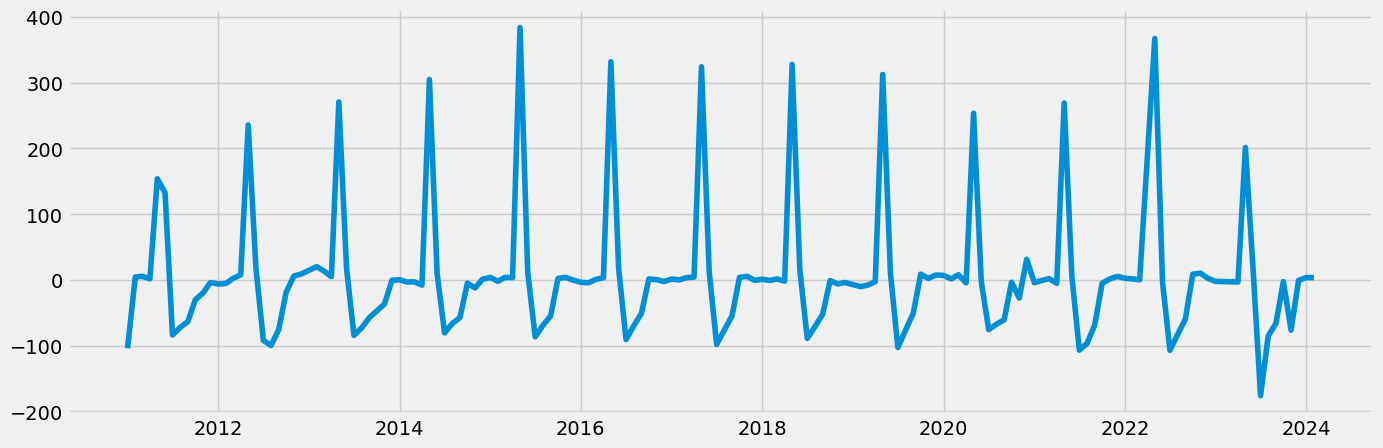

In [589]:
# Plot the time series to see the differencing
plt.figure(figsize=(15,5), dpi = 100)
plt.plot(data_diff)

In [593]:
# Recheck for stationarity by running another Dickey_Fuller test
dickey_fuller(data_diff)

Dickey-Fuller Stationarity Test:
Test Statistic                  -3.904335
p-value                          0.002003
Number of Lags Used             11.000000
Number of Observations Used    141.000000
Critical Value (1%)             -3.477601
Critical Value (5%)             -2.882266
Critical Value (10%)            -2.577822
dtype: float64


### The test statistic (-3.9043) is lower than all critical values, meaning we have strong evidence to reject the null hypothesis. The time series is now stationary. Since the p-value is below 0.05, we reject the null hypothesis and confirm that the data no longer has a unit root (i.e., it's stationary).

# 6. Check for Autocorrelation

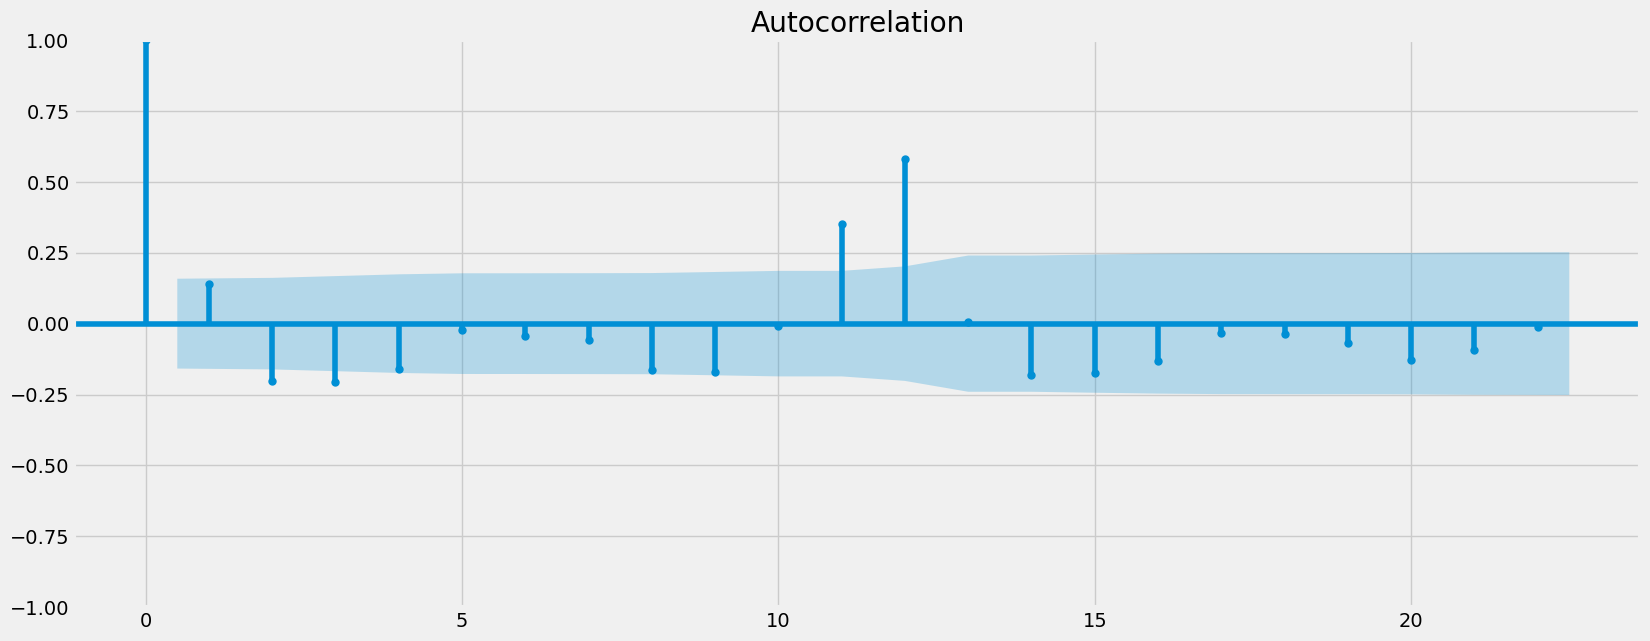

In [596]:
# Check the data's autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(data_diff)
plt.show()